In [3]:
!pip install PyMySQL
# https://github.com/PyMySQL/PyMySQL/
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.6 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.6 MB 7.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.6 MB 10.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.6 MB 11.2 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.6 MB 13.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.6 MB 14.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.9/11.6 MB 14.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.7/11.6 MB 15.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.4/11.6 MB 15.1 MB/s eta 0:00:01
   ------------------------ --------------- 7.2/11.6 MB 15.9 MB/s eta 0:00:01
   ---------------------------- ----------- 8.4/11.6 MB 17.3 MB/s eta 0:00:

In [3]:
import pymysql.cursors
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
def connect():
    # database credentials
    host = 'den1.mysql6.gear.host'
    db = 'situation'
    usr = 'situation'
    # pwd = input()
    pwd = input()

    # connect to the database
    try: 
        return pymysql.connect(host=host, user=usr, password=pwd, database=db, 
            cursorclass=pymysql.cursors.DictCursor)
    except pymysql.Error as err:
        print("error %d: %s" %(err.args[0], err.args[1]))
        return ""

In [5]:
def query_table(table_name):
    sql = f"SELECT * FROM {table_name};"

    # connect to database
    db_connection = connect()

    # check connection
    if not (type(db_connection) == str):
        # execute query and fetch results
        with db_connection.cursor() as cursor:
            cursor.execute(sql)
            result = cursor.fetchall()
        return result
    else:
        return []

In [11]:
# Call the function to query the table
dataset = query_table('t20_chemicalsensor_data')

# Print out the results
for row in dataset:
    print(row)

aichem567.
{'SensorID': 1, 'Timestamp': datetime.datetime(2024, 1, 1, 0, 0), 'SensorValue': 56.7641, 'Temperature': 20.0, 'Humidity': 60.0, 'DegradationLevel': 0.0}
{'SensorID': 1, 'Timestamp': datetime.datetime(2024, 1, 2, 0, 0), 'SensorValue': 60.1641, 'Temperature': 20.3917, 'Humidity': 59.0499, 'DegradationLevel': 0.012346}
{'SensorID': 1, 'Timestamp': datetime.datetime(2024, 1, 3, 0, 0), 'SensorValue': 62.309, 'Temperature': 21.5564, 'Humidity': 56.2088, 'DegradationLevel': 0.024691}
{'SensorID': 1, 'Timestamp': datetime.datetime(2024, 1, 4, 0, 0), 'SensorValue': 64.0033, 'Temperature': 23.419, 'Humidity': 51.6724, 'DegradationLevel': 0.037037}
{'SensorID': 1, 'Timestamp': datetime.datetime(2024, 1, 5, 0, 0), 'SensorValue': 68.76, 'Temperature': 25.7989, 'Humidity': 46.1243, 'DegradationLevel': 0.049383}
{'SensorID': 1, 'Timestamp': datetime.datetime(2024, 1, 6, 0, 0), 'SensorValue': 69.6223, 'Temperature': 28.505, 'Humidity': 40.3306, 'DegradationLevel': 0.061728}
{'SensorID': 1,

In [12]:
!pip install matplotlib
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(dataset)

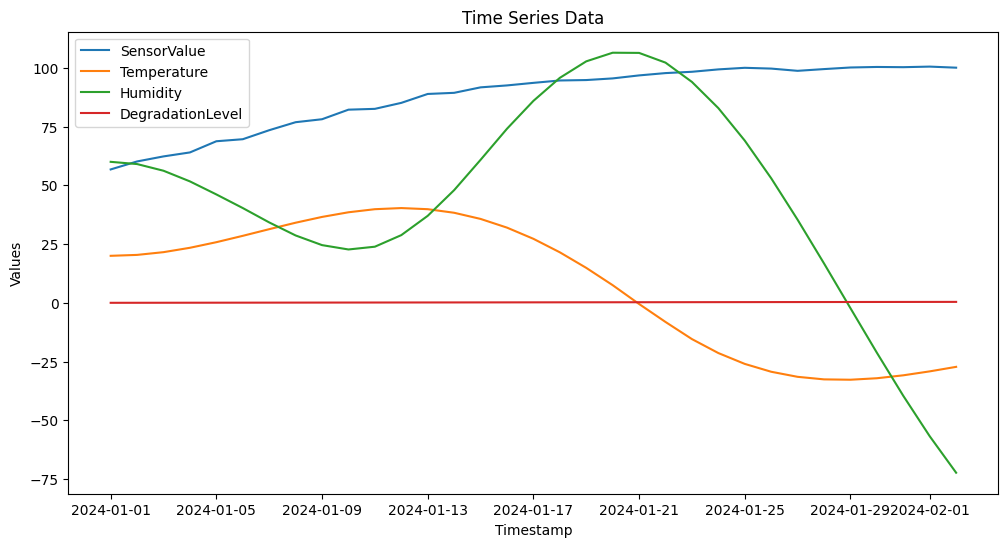

In [14]:
# Line charts
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['SensorValue'], label='SensorValue')
plt.plot(df['Timestamp'], df['Temperature'], label='Temperature')
plt.plot(df['Timestamp'], df['Humidity'], label='Humidity')
plt.plot(df['Timestamp'], df['DegradationLevel'], label='DegradationLevel')
plt.legend()
plt.title('Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()

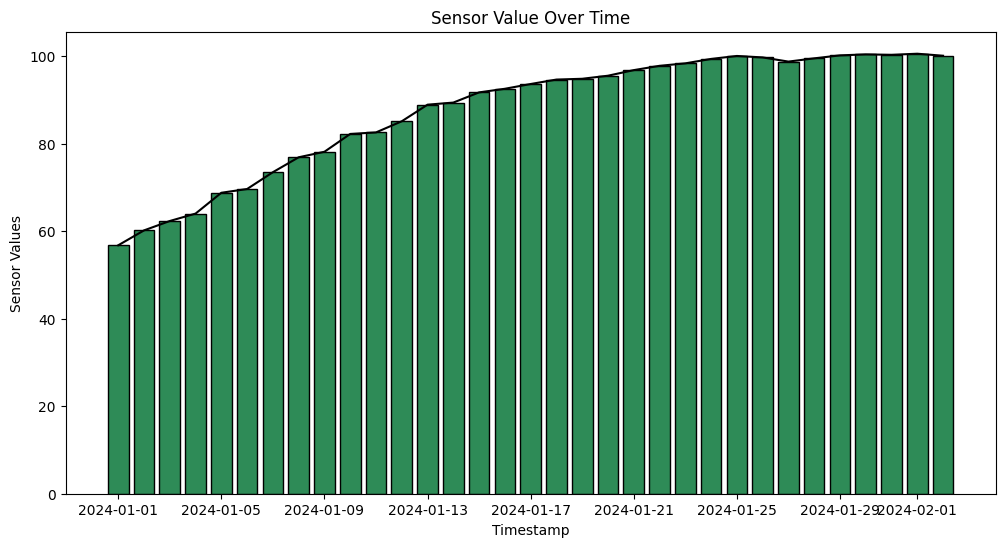

In [53]:
# Convert Timestamp to datetime
timestamps = pd.to_datetime(df['Timestamp'])

# convert feature into pandas dataframe
sensor_values = df['SensorValue']


plt.figure(figsize=(12, 6))

plt.plot(df['Timestamp'], df['SensorValue'], color='black')

plt.bar(timestamps, sensor_values, color='seagreen', edgecolor='black')

plt.title('Sensor Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.show()

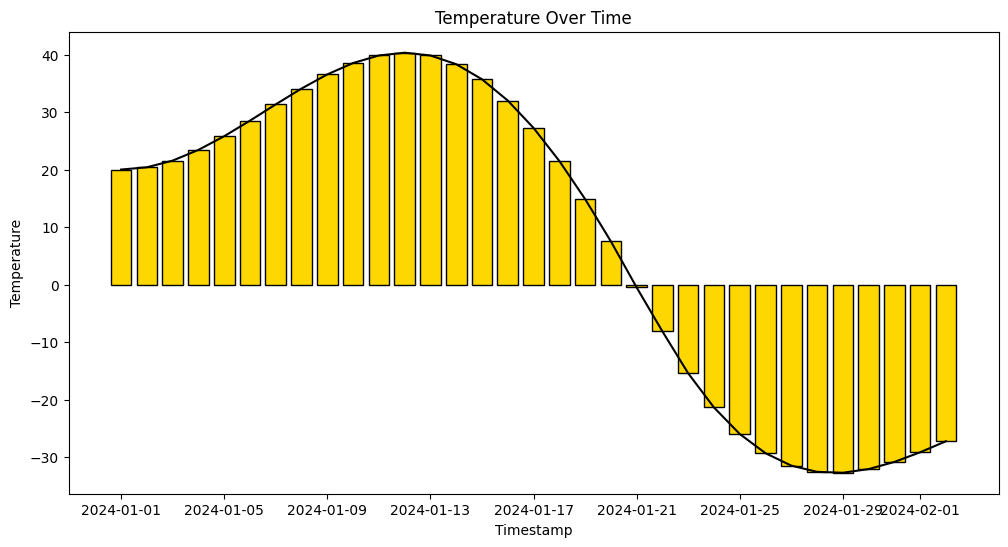

In [54]:
plt.figure(figsize=(12, 6))

plt.plot(timestamps, df['Temperature'], color='black')

plt.bar(timestamps, df['Temperature'], color='gold', edgecolor='black')


plt.title('Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.show()

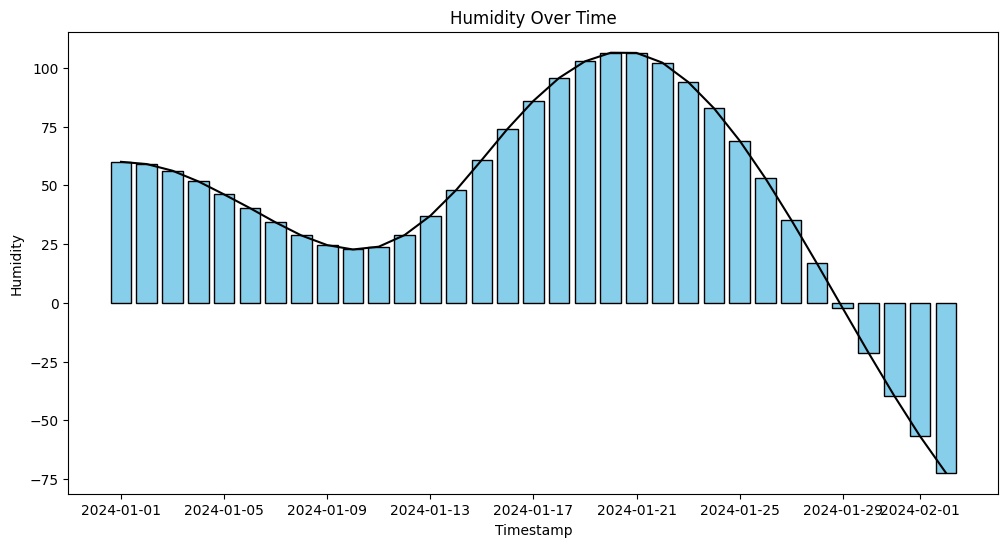

In [55]:
plt.figure(figsize=(12, 6))

plt.plot(timestamps, df['Humidity'], color='black')

plt.bar(timestamps, df['Humidity'], color='skyblue', edgecolor='black')


plt.title('Humidity Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.show()

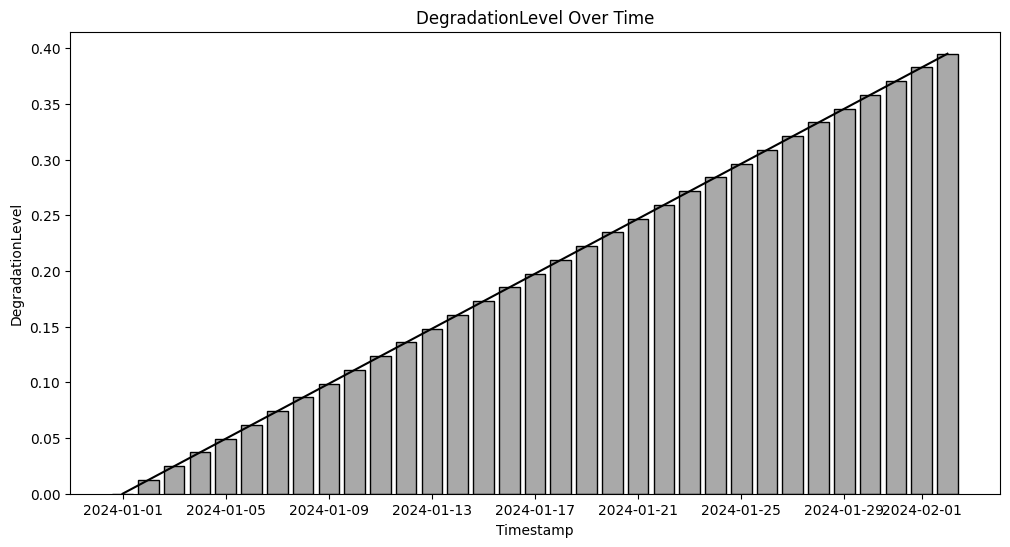

In [56]:
plt.figure(figsize=(12, 6))

plt.plot(timestamps, df['DegradationLevel'], color='black')

plt.bar(timestamps, df['DegradationLevel'], color='darkgrey', edgecolor='black')


plt.title('DegradationLevel Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DegradationLevel')
plt.show()

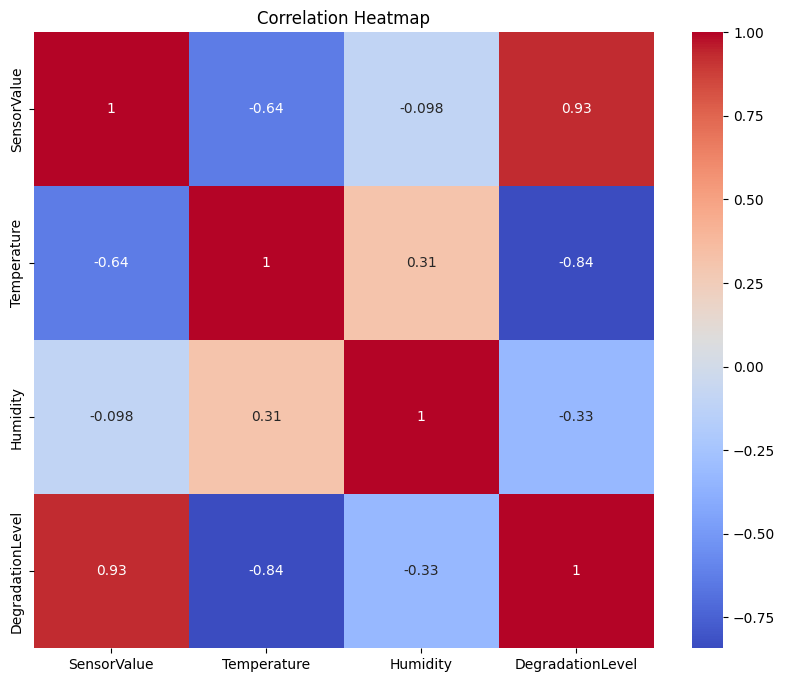

In [18]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[['SensorValue', 'Temperature', 'Humidity', 'DegradationLevel']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

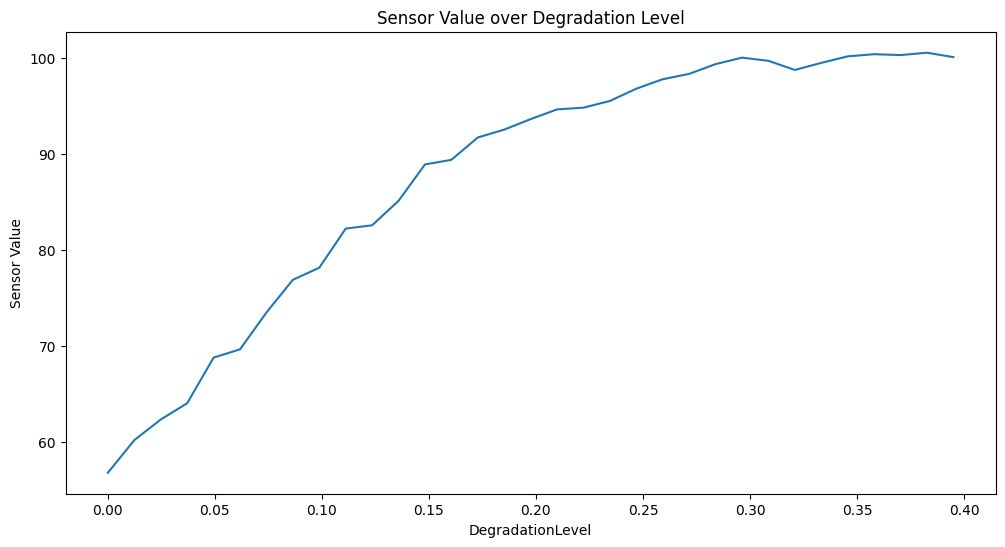

In [44]:
plt.figure(figsize=(12, 6))

plt.plot(df['DegradationLevel'], df['SensorValue'])


plt.title('Sensor Value over Degradation Level')
plt.ylabel('Sensor Value')
plt.xlabel('DegradationLevel')
plt.show()

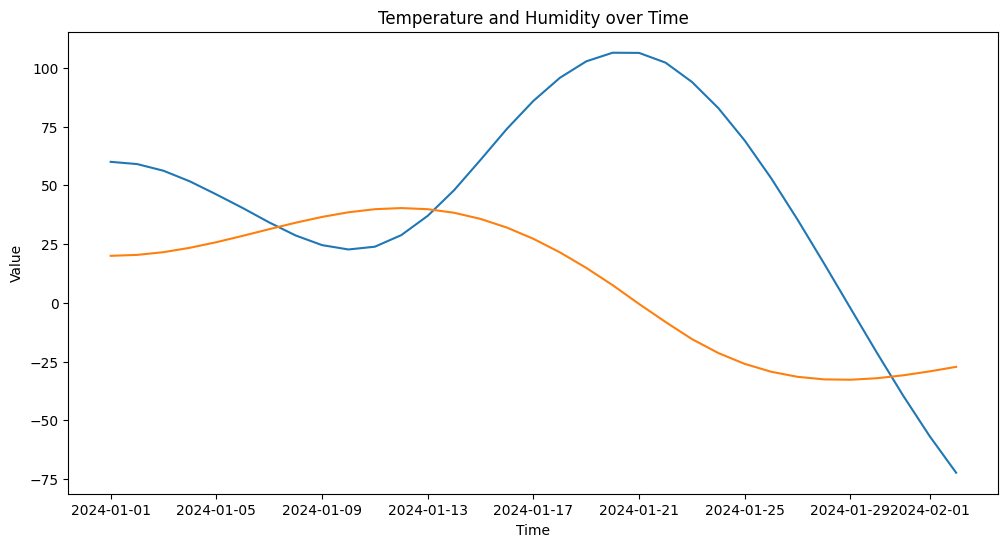

In [46]:
plt.figure(figsize=(12, 6))

plt.plot(timestamps, df['Humidity'])
plt.plot(timestamps, df['Temperature'])


plt.title('Temperature and Humidity over Time')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()